# **AI Project**
Applying the algorithms : DFS with backtracking, Uniform Cost Search, A* Manhattan Distance, A* Euclidian Distance and Q-learning to the grid problem.

# 1.

### Importing Packages

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from heapq import heappop, heappush
import math

### Grid Generating

In [ ]:
def generate_grid(n_rows, n_cols):
    # Define the number of walls to add to the grid
    n_walls = random.randint(n_rows//2, n_rows//2 + 5)

    # Initialize the grid with zeros
    grid = np.zeros((n_rows, n_cols))

    # Add walls to the grid
    for i in range(n_walls):
       # Generate random coordinates for the wall
        row = random.randint(0, n_rows-1)
        col = random.randint(0, n_cols-1)
        # Set the grid cell at the wall coordinates to 1
        grid[row][col] = 1

    return grid

### Grid Plotting

In [ ]:
def plot_grid(grid):
    # Define the colors for each cell type
    cmap = plt.cm.colors.ListedColormap(['white', 'red', 'lightblue', 'green'])

    # Plot the grid
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(grid, interpolation='nearest', cmap=cmap, vmin=0, vmax=4)
    # Set the ticks for the x and y axes
    ax.set_xticks(np.arange(grid.shape[1]))
    ax.set_yticks(np.arange(grid.shape[0]))
    # Add gridlines to the plot
    ax.grid(color='black', linestyle='-', linewidth=1)
    # Display the plot
    plt.show()

### Mouvements and Costs Definition

In [ ]:
# Define the cost of movement
costs = {
    'straight': 1.0,
    'diagonal': 1.5
}

# Define the movements (up, down, left, right, diagonals)
movements = [
    (-1, 0),  # Up
    (1, 0),   # Down
    (0, -1),  # Left
    (0, 1),   # Right
    (-1, -1), # Diagonal up-left
    (-1, 1),  # Diagonal up-right
    (1, -1),  # Diagonal down-left
    (1, 1)    # Diagonal down-right
]

###  Path Plotting

In [ ]:
def plot_path(grid, path):
    # Define the colors for each cell type
    cmap = plt.cm.colors.ListedColormap(['white', 'red', 'lightblue', 'green'])

    # Define the color for the path cells
    path_color = plt.cm.tab10(1)

    # Create a copy of the grid to plot the path on
    path_grid = np.copy(grid)

    # Mark the cells on the path
    start_node = path[0]
    end_node = path[-1]
    path_nodes = path[1:-1]
    for node in path_nodes:
        path_grid[node[0], node[1]] = 2

    # Mark the start and end nodes with different colors
    path_grid[start_node[0], start_node[1]] = 3
    path_grid[end_node[0], end_node[1]] = 4

    # Plot the grid with the path
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(path_grid, interpolation='nearest', cmap=cmap, vmin=0, vmax=4)
    ax.set_xticks(np.arange(grid.shape[1]))
    ax.set_yticks(np.arange(grid.shape[0]))
    ax.grid(color='black', linestyle='-', linewidth=1)

    # Add arrows to the path to indicate the direction
    for i in range(1, len(path)):
        curr_node = path[i]
        prev_node = path[i-1]
        dx, dy = curr_node[1] - prev_node[1], curr_node[0] - prev_node[0]
        if dx != 0 or dy != 0:
            ax.annotate("", xy=(curr_node[1], curr_node[0]), xytext=(prev_node[1], prev_node[0]),
                        arrowprops=dict(arrowstyle="->", color=path_color, linewidth=2, mutation_scale=10),
                        size=20)
    # Display the plot
    plt.show()


### DFS and Backtracking

In [ ]:
def dfs_backtrack_cost(grid, start, end, costs, movements):
    # Define a stack to keep track of visited cells
    stack = [(start, [start], 0)]
    # Define a set to keep track of visited cells
    visited = set()
    # Initialize variables to keep track of nodes visited and maximum nodes in memory
    nodes_visited = 0
    max_nodes = 0
    # Loop until the stack is empty
    while stack:
        # Pop the last cell, its path, and its cost from the stack
        cell, path, cost = stack.pop()
        # Check if the cell is the end node
        if cell == end:
            return path, cost, nodes_visited, max_nodes
        # Mark the cell as visited
        visited.add(cell)
        # Increment the number of nodes visited
        nodes_visited += 1
        # Update the maximum number of nodes in memory
        max_nodes = max(max_nodes, len(stack) + len(visited))
        # Loop through the movements
        for m in movements:
            # Calculate the next cell to move to
            next_cell = (cell[0] + m[0], cell[1] + m[1])
            # Check if the next cell is within the grid and not a wall or visited
            if (0 <= next_cell[0] < len(grid) and 0 <= next_cell[1] < len(grid[0])
                    and grid[next_cell[0]][next_cell[1]] != 1 and next_cell not in visited):
                # Calculate the cost of moving to the next cell
                if m in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    movement_cost = costs['straight']
                else:
                    movement_cost = costs['diagonal']
                # Add the next cell and its path and cost to the stack
                stack.append((next_cell, path + [next_cell], cost + movement_cost))
                # Mark the next cell as visited
                visited.add(next_cell)
    # If no path is found, return an empty list
    return [], float('inf'), nodes_visited, max_nodes


### Uniform Cost Search

In [ ]:
def uniform_cost_search(grid, start, end, costs, movements):
    # Define a priority queue to keep track of visited cells
    pq = PriorityQueue()
    pq.put((0, start, [start], 0))
    # Define a set to keep track of visited cells
    visited = set()
    # Define a dictionary to keep track of costs for each cell
    cell_costs = {start: 0}
    # Define variables to keep track of the number of visited nodes and max number of nodes in memory
    visited_nodes = 0
    max_nodes_in_memory = 1

    # Loop until the priority queue is empty
    while not pq.empty():
        # Pop the cell with the lowest cost
        curr_cost, curr_cell, curr_path, curr_total_cost = pq.get()
        visited_nodes += 1

        # Check if the cell is the end node
        if curr_cell == end:
            return curr_path, visited_nodes, max_nodes_in_memory, curr_total_cost

        # Mark the cell as visited
        visited.add(curr_cell)

        # Loop through the movements
        for m in movements:
            # Calculate the next cell to move to
            next_cell = (curr_cell[0] + m[0], curr_cell[1] + m[1])
            # Check if the next cell is within the grid and not a wall or visited
            if (0 <= next_cell[0] < len(grid) and 0 <= next_cell[1] < len(grid[0])
                    and grid[next_cell[0]][next_cell[1]] != 1 and next_cell not in visited):
                # Calculate the cost of moving to the next cell
                if m in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    movement_cost = costs['straight']
                else:
                    movement_cost = costs['diagonal']
                # Calculate the total cost of the next cell
                next_total_cost = curr_total_cost + movement_cost
                # Check if the next cell has not been visited or has a lower cost
                if next_cell not in cell_costs or next_total_cost < cell_costs[next_cell]:
                    # Update the cost for the next cell
                    cell_costs[next_cell] = next_total_cost
                    # Add the next cell and its path and total cost to the priority queue
                    pq.put((next_total_cost, next_cell, curr_path + [next_cell], next_total_cost))
                    # Update the max number of nodes in memory
                    max_nodes_in_memory = max(max_nodes_in_memory, pq.qsize())
    # If no path is found, return an empty list
    return [], visited_nodes, max_nodes_in_memory, float('inf')

### A* Manhattan Distance

In [ ]:
def A_star_manhattan(grid, start, end, costs, movements):
    # Define a priority queue to keep track of cells with lowest total cost
    queue = [(0, start, [start], 0)]
    # Define a set to keep track of visited cells
    visited = set()
    # Define a variable to keep track of the maximum number of nodes in memory
    max_in_memory = 0
    # Loop until the queue is empty
    while queue:
        # Pop the cell with the lowest total cost
        _, cell, path, cost = heappop(queue)
        # Check if the cell is the end node
        if cell == end:
            # Return the path, visited nodes, max number of nodes in memory, and the cost
            return path, len(visited), max_in_memory, cost
        # Mark the cell as visited
        visited.add(cell)
        # Loop through the movements
        for m in movements:
            # Calculate the next cell to move to
            next_cell = (cell[0] + m[0], cell[1] + m[1])
            # Check if the next cell is within the grid and not a wall or visited
            if (0 <= next_cell[0] < len(grid) and 0 <= next_cell[1] < len(grid[0])
                    and grid[next_cell[0]][next_cell[1]] != 1 and next_cell not in visited):
                # Calculate the cost of moving to the next cell
                if m in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    movement_cost = costs['straight']
                else:
                    movement_cost = costs['diagonal']
                # Calculate the heuristic cost using the Manhattan distance
                heuristic_cost = abs(next_cell[0] - end[0]) + abs(next_cell[1] - end[1])
                # Calculate the total cost
                total_cost = cost + movement_cost + heuristic_cost
                # Add the next cell and its path, cost, and total cost to the queue
                heappush(queue, (total_cost, next_cell, path + [next_cell], cost + movement_cost))
                # Mark the next cell as visited
                visited.add(next_cell)
        # Update the maximum number of nodes in memory
        max_in_memory = max(max_in_memory, len(queue) + len(visited))
    # If no path is found, return an empty list
    return [], len(visited), max_in_memory, float('inf')


### A* Euclidian Distance

In [ ]:
def euclidean_distance(cell, goal):
    """Calculates the Euclidean distance between two cells"""
    x1, y1 = cell
    x2, y2 = goal
    return round(math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2), 1)

def A_star_euclidean(grid, start, end, costs, movements):
    """A* algorithm implementation with Euclidean distance as the heuristic function"""
    # Define a priority queue to keep track of the cells to visit
    queue = []
    # Define a set to keep track of visited cells
    visited = set()
    # Push the starting cell with its path and cost onto the queue
    heappush(queue, (0, start, [start], 0))
    # Define variables to keep track of the maximum number of nodes in memory and the cost
    max_in_memory = 1
    total_cost = 0
    # Loop until the queue is empty
    while queue:
        # Pop the cell with the lowest total cost
        _, cell, path, cost = heappop(queue)
        # Check if the cell is the end node
        if cell == end:
            return path, len(visited), max_in_memory, cost
        # Mark the cell as visited
        visited.add(cell)
        # Loop through the movements
        for m in movements:
            # Calculate the next cell to move to
            next_cell = (cell[0] + m[0], cell[1] + m[1])
            # Check if the next cell is within the grid and not a wall or visited
            if (0 <= next_cell[0] < len(grid) and 0 <= next_cell[1] < len(grid[0])
                    and grid[next_cell[0]][next_cell[1]] != 1 and next_cell not in visited):
                # Calculate the cost of moving to the next cell
                if m in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    movement_cost = costs['straight']
                else:
                    movement_cost = costs['diagonal']
                # Calculate the total cost of the path through the next cell
                total_cost = cost + movement_cost + euclidean_distance(next_cell, end)
                # Push the next cell with its path and total cost onto the queue
                heappush(queue, (total_cost, next_cell, path + [next_cell], cost + movement_cost))
                # Update the maximum number of nodes in memory
                max_in_memory = max(max_in_memory, len(queue) + len(visited))
    # If no path is found, return an empty list
    return [], len(visited), max_in_memory, float('inf')

### Q-Learning

In [ ]:
def q_learning(grid, start, end, rewards, gamma=0.9, alpha=0.1, movements=movements, epsilon=0.1, num_episodes=1000):
    n_rows, n_cols = grid.shape
    n_actions = len(movements)
    q_table = np.zeros((n_rows, n_cols, n_actions))

    # Q-learning algorithm
    for episode in range(num_episodes):
        state = start
        while state != end:
            # Epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                action = random.choice(range(n_actions))
            else:
                action = np.argmax(q_table[state])

            movement = movements[action]
            next_state = (state[0] + movement[0], state[1] + movement[1])

            # Check if the next state is out of bounds or a wall
            if next_state[0] < 0 or next_state[0] >= n_rows or next_state[1] < 0 or next_state[1] >= n_cols or grid[next_state[0]][next_state[1]] == 1:
                # Assign a negative reward for going out of bounds or hitting a wall
                reward = -5
                next_state = state  # Stay in the same state
            else:
                reward = rewards[next_state[0]][next_state[1]]
            # Update Q-value using the Q-learning update rule
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
            state = next_state
    # Generate the optimal path using the learned Q-table
    path = [start]
    while path[-1] != end:
        state = path[-1]
        action = np.argmax(q_table[state])
        movement = movements[action]
        next_state = (state[0] + movement[0], state[1] + movement[1])
        path.append(next_state)

    print("The number of episodes is:", num_episodes)
    return path

### Comparative Plot

In [ ]:
def plot_algorithm_comparison(algorithms, nodes_visited, max_nodes):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    # Set the width of each bar
    bar_width = 0.35
    # Calculate the positions for the bars
    bar_positions1 = np.arange(len(algorithms))
    bar_positions2 = bar_positions1 + bar_width
    # Plot the number of nodes visited as the first bar
    ax.bar(bar_positions1, nodes_visited, bar_width, label='Nodes Visited')
    # Plot the maximum number of nodes in memory as the second bar
    ax.bar(bar_positions2, max_nodes, bar_width, label='Max Nodes in Memory')
    # Set the x-axis ticks and labels
    ax.set_xticks(bar_positions1 + bar_width / 2)
    ax.set_xticklabels(algorithms)
    # Set the y-axis label
    ax.set_ylabel('Number of Nodes')
    # Add a legend
    ax.legend()
    # Show the plot
    plt.show()

# 2.

Here we're gonna generate the first grid 10 * 10 :

In [ ]:
g=generate_grid(10, 10)

Applying DFS with Backtracking:

In [ ]:
path1,cost1,visited1,max_in_memory1 = dfs_backtrack_cost(g, (1, 1), (9, 5), costs, movements)
print("The path of nodes : {}".format(path1))
print("The cost is : {}".format(cost1))
print("The number of visited nodes is : {}".format(visited1))
print("The number of maximum nodes in memory : {}".format(max_in_memory1))

The path of nodes : [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 7), (9, 6), (9, 5)]
The cost is : 14.0
The number of visited nodes is : 35
The number of maximum nodes in memory : 116


Plotting The Path :

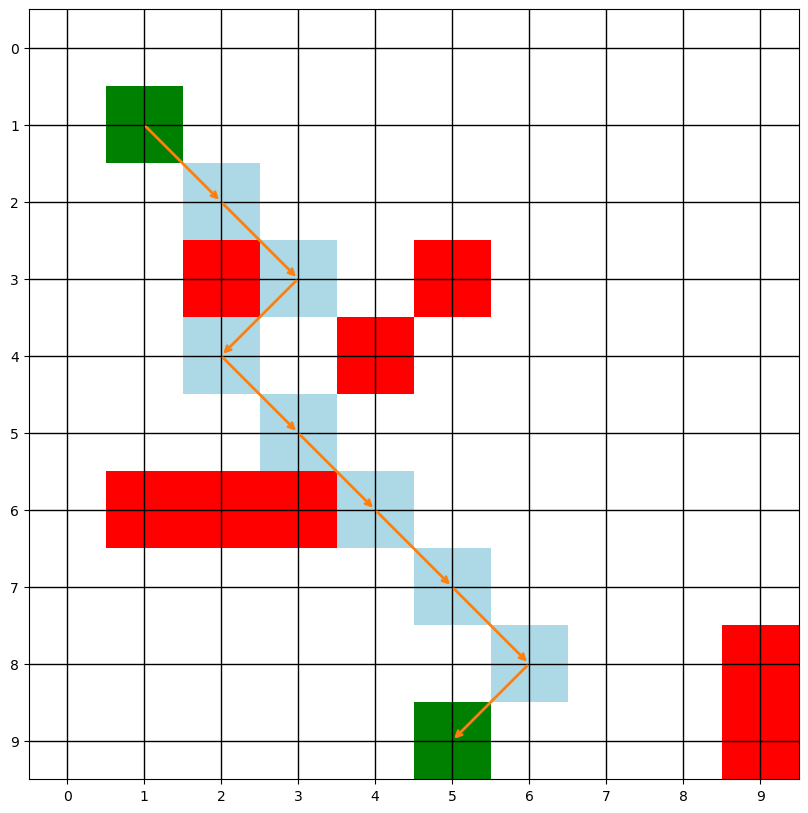

In [ ]:
plot_path(g, path1)

Applying Uniform Cost Search :

In [ ]:
path2,visited2,max_in_memory2,cost2 = uniform_cost_search(g, (1, 1), (9, 5), costs, movements)
print("The path of nodes : {}".format(path2))
print("The cost is : {}".format(cost2))
print("The number of visited nodes is : {}".format(visited2))
print("The number of maximum nodes in memory : {}".format(max_in_memory2))

The path of nodes : [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 4), (9, 5)]
The cost is : 10.0
The number of visited nodes is : 86
The number of maximum nodes in memory : 20


Plotting The Path :

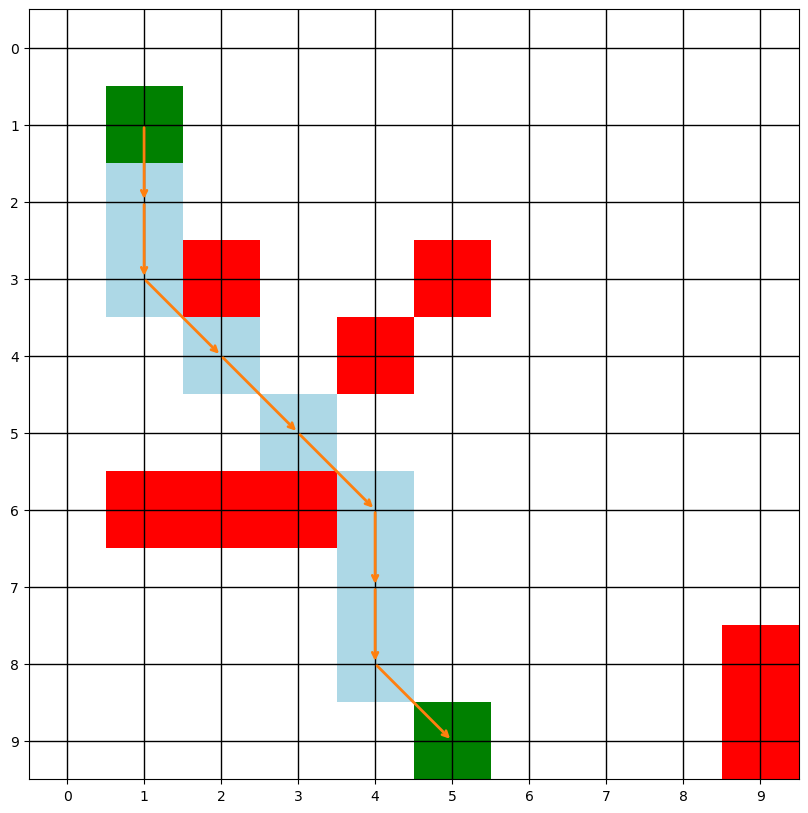

In [ ]:
plot_path(g, path2)

Applying A* with Manhattan Distance :

In [ ]:
path3,visited3,max_in_memory3,cost3= A_star_manhattan(g,  (1, 1), (9, 5), costs, movements)
print("The path of nodes : {}".format(path3))
print("The cost is : {}".format(cost3))
print("The number of visited nodes is : {}".format(visited3))
print("The number of maximum nodes in memory : {}".format(max_in_memory3))

The path of nodes : [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)]
The cost is : 10.0
The number of visited nodes is : 37
The number of maximum nodes in memory : 66


Plotting The Path :

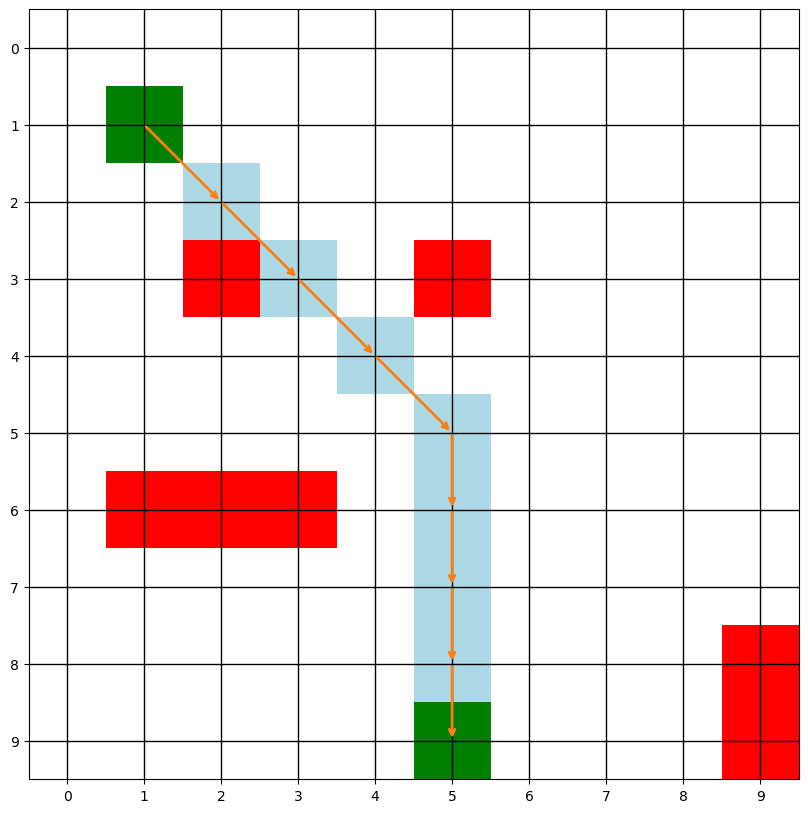

In [ ]:
plot_path(g, path3)

Applying A* with Euclidian Distance :

In [ ]:
path4,visited4,max_in_memory4,cost4= A_star_euclidean(g,  (1, 1), (9, 5), costs, movements)
print("The path of nodes : {}".format(path4))
print("The cost is : {}".format(cost4))
print("The number of visited nodes is : {}".format(visited4))
print("The number of maximum nodes in memory : {}".format(max_in_memory4))

The path of nodes : [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 4), (9, 5)]
The cost is : 10.0
The number of visited nodes is : 27
The number of maximum nodes in memory : 785


Plotting The Path :

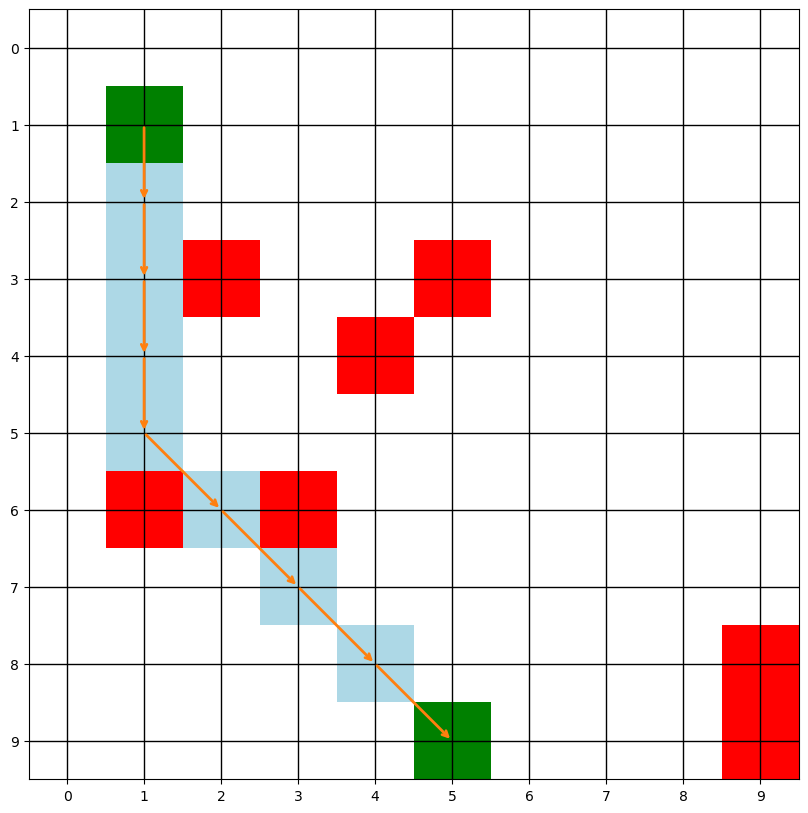

In [ ]:
plot_path(g, path4)

Applying Q-Learning :

In [ ]:
# Define the start and end nodes
start = (random.randint(0, 10-1), random.randint(0, 10-1))
end = (random.randint(0, 10-1), random.randint(0,10-1))
rewards = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if (i,j) == end:
            rewards[i][j] = 100
        elif g[i][j] == 1:
            rewards[i][j] = -5

path5 = q_learning(g, start, end, rewards)

The number of episodes is: 1000


Plotting The Path :

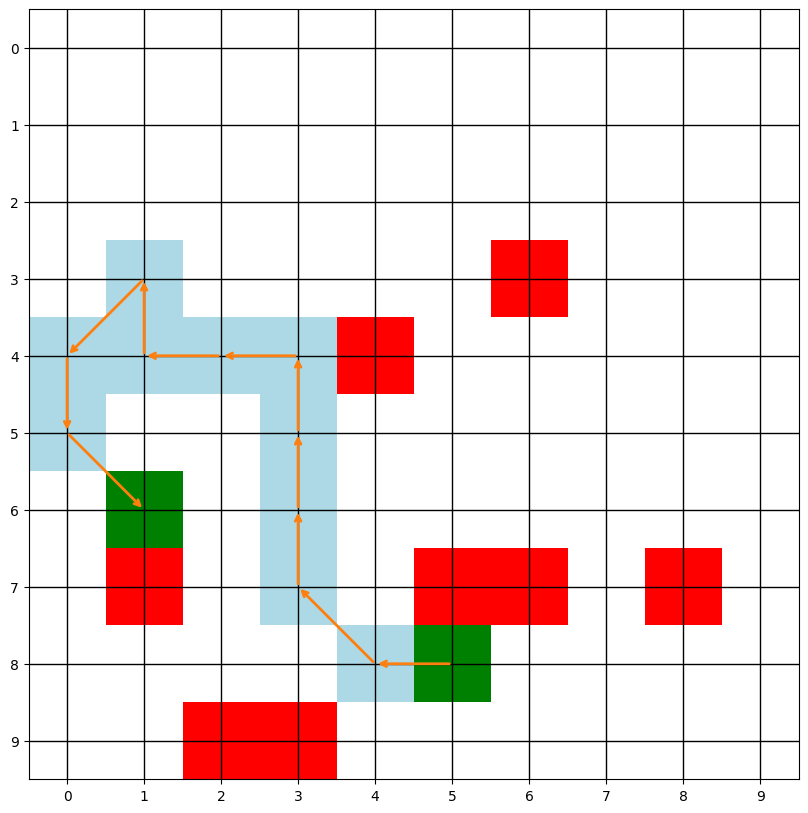

In [ ]:
plot_path(g, path5)

# 3.

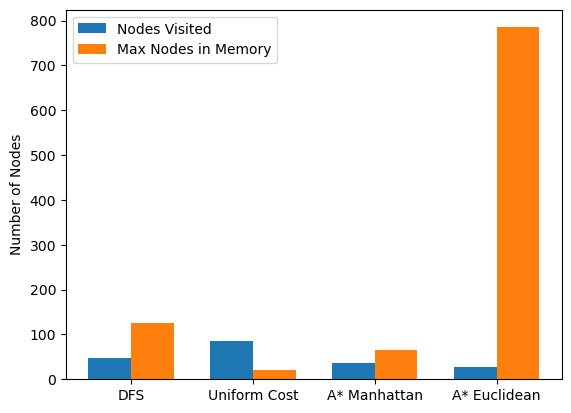

In [ ]:
algorithms = ['DFS', 'Uniform Cost', 'A* Manhattan', 'A* Euclidean']
nodes_visited = [visited1, visited2, visited3, visited4]
max_nodes = [max_in_memory1, max_in_memory2, max_in_memory3, max_in_memory4]

plot_algorithm_comparison(algorithms, nodes_visited, max_nodes)

### Interpretation

For the different algorithms, we obtained a varity of visited nodes and maximum nodes in memory :
* **DFS With Backtracking** : The number of visited nodes for this algorithm is 35 and the number of maximum nodes in memory is 116.
* **Uniform Cost Search** : The number of visited nodes for this algorithm is 86 and the number of maximum nodes in memory is 20.
* **A* With Manhattan Distance** : The number of visited nodes for this algorithm i is 37 and the number of maximum nodes in memory is 66.
* **A* With Euclidian Distance** : The number of visited nodes for this algorithm i is 27 and the number of maximum nodes in memory is 785.

We can notice that the A* Euclidian has a very noticeable number of max nodes in memory. This is due to the fact that the A* algorithm itself tends to explore all the nodes. In addition to that, the Euclidean heuristic might not provide tight bounds on the actual cost, resulting in more nodes being expanded and stored in memory. In oppsition to the Manhattan heuristic, it tends to have better performance in terms of the number of nodes generated.

When it comes to the other algorithms, the A* With Manhattan Distance is the most optimal one. This algorithm is known to be very effective as well because it explores the search space more efficiently.

DFS is also a costly algorithm as we can see the number of maximum nodes in memory is 116. DFS is not an optimal algorithm because it explores paths in a depth-first manner, meaning it prioritizes going as deep as possible before backtracking. In large grids with many obstacles, DFS can get stuck exploring a deep path without finding a solution, neglecting other parts of the grid.

Uniform Cost Search also visits a lot of nodes while doing its search. It's totally understandable as this algorithm explores the search space uniformly, considering the cost of reaching each node from the start node. This algorithm as well can be quite costly when the search space is big.

## 4.

## Grid 20*20

In [ ]:
g1=generate_grid(20, 20)

Applying DFS with Backtracking :

In [ ]:
path5,cost5,visited5,max_in_memory5 = dfs_backtrack_cost(g1, (3, 19), (18, 10), costs, movements)
print("The path of nodes : {}".format(path5))
print("The cost is : {}".format(cost5))
print("The number of visited nodes is : {}".format(visited5))
print("The number of maximum nodes in memory : {}".format(max_in_memory5))

The path of nodes : [(3, 19), (4, 18), (5, 19), (6, 18), (7, 19), (8, 18), (9, 19), (10, 18), (11, 19), (12, 18), (13, 19), (14, 18), (15, 19), (16, 18), (17, 19), (18, 18), (19, 17), (18, 16), (19, 15), (18, 14), (19, 13), (18, 12), (19, 11), (18, 10)]
The cost is : 34.5
The number of visited nodes is : 24
The number of maximum nodes in memory : 116


Plotting the path :

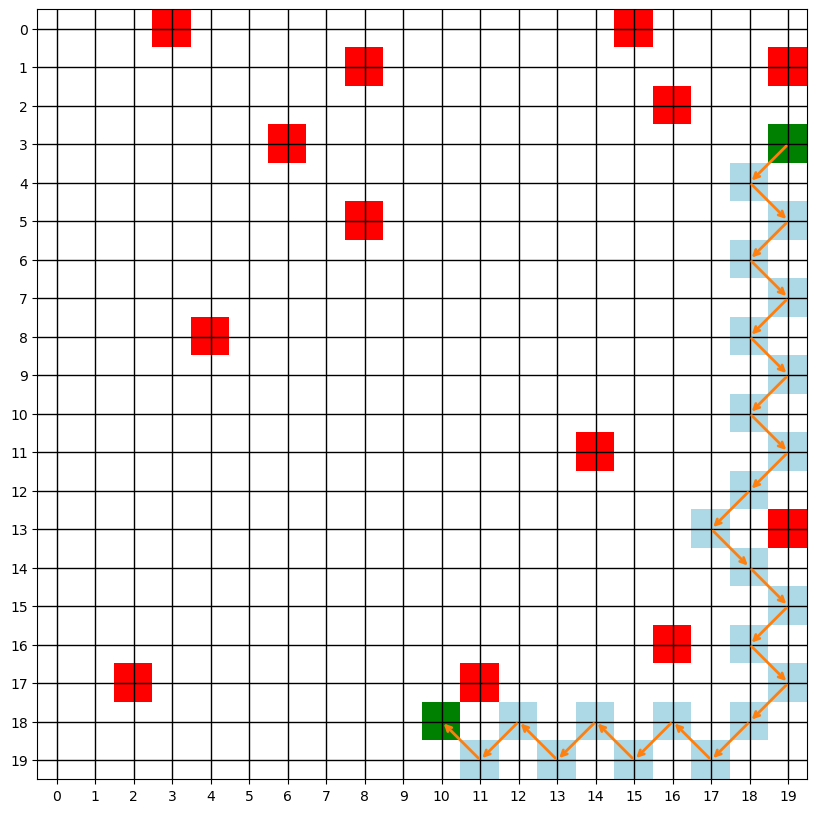

In [ ]:
plot_path(g1, path5)

Applying Uniform Cost Search :

In [ ]:
path6,visited6,max_in_memory6,cost6 = uniform_cost_search(g1,(3, 19), (18, 10), costs, movements)
print("The path of nodes : {}".format(path6))
print("The cost is : {}".format(cost6))
print("The number of visited nodes is : {}".format(visited6))
print("The number of maximum nodes in memory : {}".format(max_in_memory6))

The path of nodes : [(3, 19), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 18), (10, 17), (11, 16), (12, 15), (13, 14), (14, 13), (15, 12), (16, 11), (17, 11), (18, 10)]
The cost is : 19.5
The number of visited nodes is : 318
The number of maximum nodes in memory : 37


Plotting The Path :

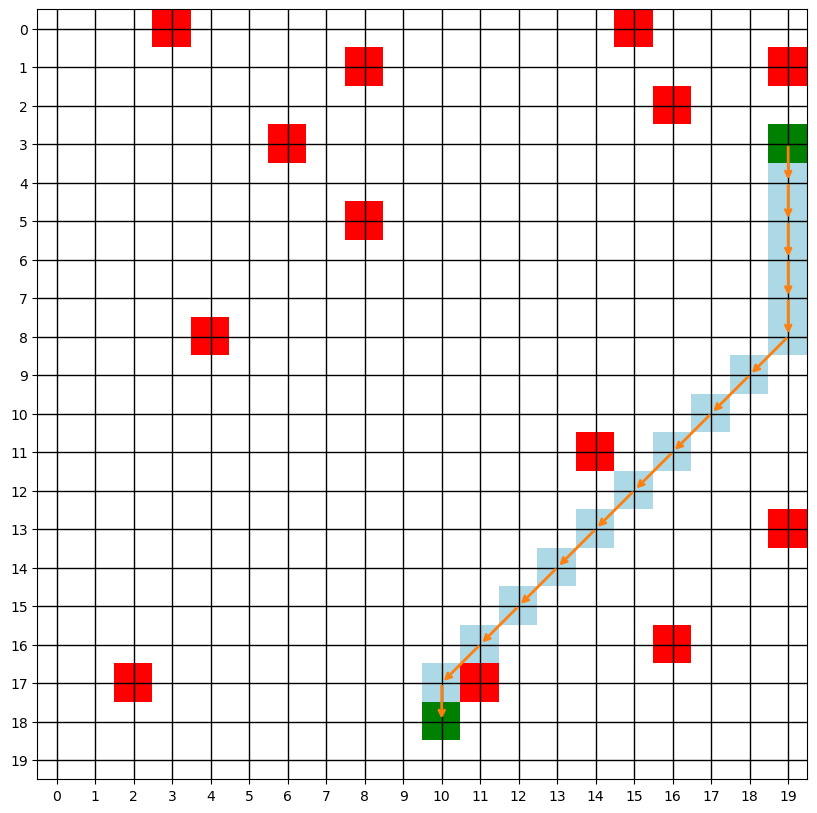

In [ ]:
plot_path(g1, path6)

Applying A* with Manhattan Distance :

In [ ]:
path7,visited7,max_in_memory7,cost7= A_star_manhattan(g1,(3, 19), (18, 10), costs, movements)
print("The path of nodes : {}".format(path7))
print("The cost is : {}".format(cost7))
print("The number of visited nodes is : {}".format(visited7))
print("The number of maximum nodes in memory : {}".format(max_in_memory7))

The path of nodes : [(3, 19), (4, 18), (5, 17), (6, 16), (7, 15), (8, 14), (9, 13), (10, 12), (11, 11), (12, 10), (13, 10), (14, 10), (15, 10), (16, 10), (17, 10), (18, 10)]
The cost is : 19.5
The number of visited nodes is : 64
The number of maximum nodes in memory : 113


Plotting The Plot :

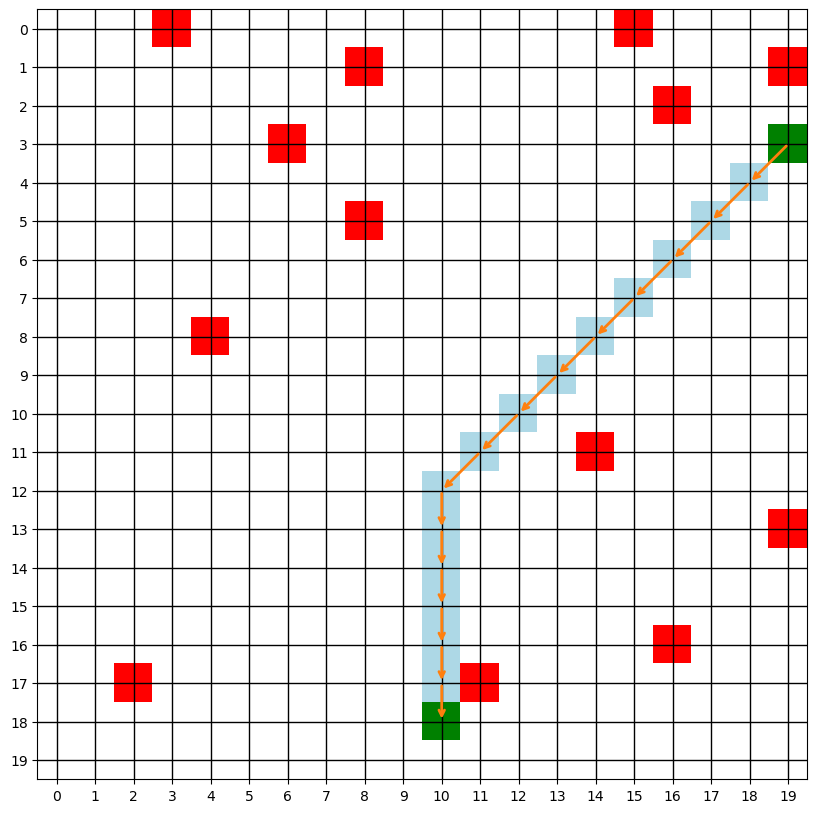

In [ ]:
plot_path(g1, path7)

Applying A* with Euclidian Distance :

In [ ]:
path8,visited8,max_in_memory8,cost8= A_star_euclidean(g1, (3,19), (18,10), costs, movements)
print("The path of nodes : {}".format(path8))
print("The cost is : {}".format(cost8))
print("The number of visited nodes is : {}".format(visited8))
print("The number of maximum nodes in memory : {}".format(max_in_memory8))

The path of nodes : [(3, 19), (4, 18), (5, 17), (6, 16), (7, 15), (8, 14), (9, 13), (10, 12), (11, 11), (12, 10), (13, 10), (14, 10), (15, 10), (16, 10), (17, 10), (18, 10)]
The cost is : 19.5
The number of visited nodes is : 90
The number of maximum nodes in memory : 21090


Plotting the plot :

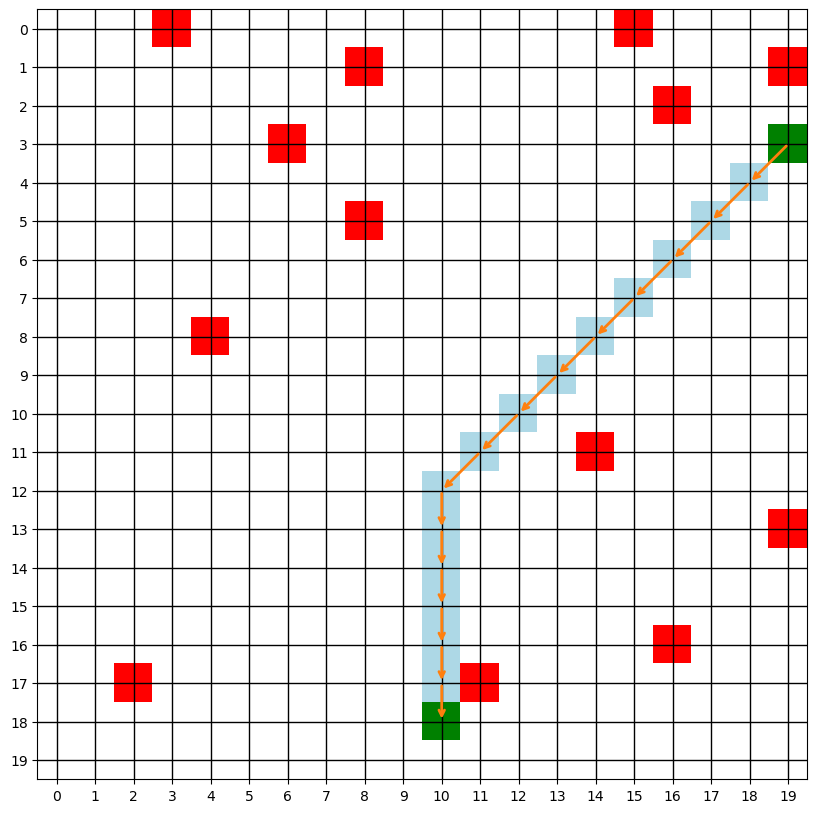

In [ ]:
plot_path(g1, path8)

Applying Q-learning :

In [ ]:
# Define the start and end nodes
start = (random.randint(0, 20-1), random.randint(0, 20-1))
end = (random.randint(0, 20-1), random.randint(0,20-1))
rewards = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        if (i,j) == end:
            rewards[i][j] = 100
        elif g1[i][j] == 1:
            rewards[i][j] = -5

path9 = q_learning(g1, start, end, rewards)

Plotting The Path :

In [ ]:
plot_path(g1, path9)

Here, the code took a lot of time to run and it ended up not working since it uses a lot of memory storage.
It's due to the big size of the state space and the number of movements. We tried to reduce the number of episodes, the values of gamma, alpha and epsilon but it still didn't work.

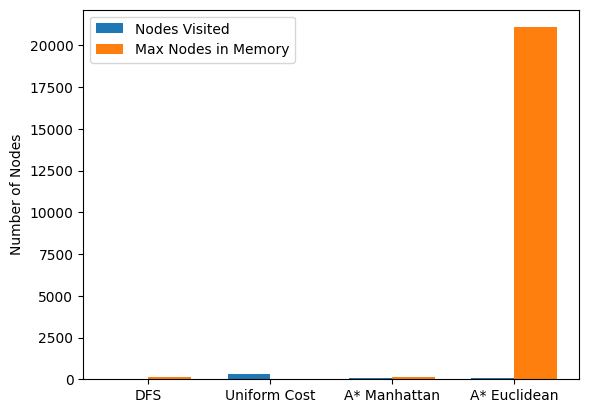

In [ ]:
algorithms = ['DFS', 'Uniform Cost', 'A* Manhattan', 'A* Euclidean']
nodes_visited = [visited5, visited6, visited7, visited8]
max_nodes = [max_in_memory5, max_in_memory6, max_in_memory7, max_in_memory8]

plot_algorithm_comparison(algorithms, nodes_visited, max_nodes)

### Interpretation

For the different algorithms, we obtained a varity of visited nodes and maximum nodes in memory :
* **DFS With Backtracking** : The number of visited nodes for this algorithm is 24 and the number of maximum nodes in memory is 116.
* **Uniform Cost Search** : The number of visited nodes for this algorithm is 318 and the number of maximum nodes in memory is 37.
* **A* With Manhattan Distance** : The number of visited nodes for this algorithm is 64 and the number of maximum nodes in memory is 113.
* **A* With Euclidian Distance** : The number of visited nodes for this algorithm is 90 and the number of maximum nodes in memory is 21090.

We can notice that the A* Euclidian has a very noticeable number of max nodes in memory. This is due to the fact that the A* algorithm itself tends to explore all the nodes. In addition to that, the Euclidean heuristic might not provide tight bounds on the actual cost, resulting in more nodes being expanded and stored in memory. In oppsition to the Manhattan heuristic, it tends to have better performance in terms of the number of nodes generated. For this grid, the number of maximum nodes in memory is 21090. This number is quite big and we can imagine for bigger sizes how it's going to grow. As mentioned, due to the Euclidian heuristic, this algorithm explores unnecessary paths therefore increase the number of nodes in memory.

When it comes to the other algorithms, the A* With Manhattan Distance is the most optimal one. This algorithm is known to be very effective as well because it explores the search space more efficiently.

DFS is also a costly algorithm as we can see the number of maximum nodes in memory is 116. DFS is not an optimal algorithm because it explores paths in a depth-first manner, meaning it prioritizes going as deep as possible before backtracking. In large grids with many obstacles, DFS can get stuck exploring a deep path without finding a solution, neglecting other parts of the grid.

Uniform Cost Search also visits a lot of nodes while doing its search. It's totally understandable as this algorithm explores the search space uniformly, considering the cost of reaching each node from the start node. This algorithm as well can be quite costly when the search space is big.

## 5.

## Grid 30*30

In [ ]:
g2=generate_grid(30, 30)

Applying DFS with Backtracking :

In [ ]:
path9,cost9,visited9,max_in_memory9 = dfs_backtrack_cost(g2, (1,12), (28,19), costs, movements)
print("The path of nodes : {}".format(path9))
print("The cost is : {}".format(cost9))
print("The number of visited nodes is : {}".format(visited9))
print("The number of maximum nodes in memory : {}".format(max_in_memory9))

The path of nodes : [(1, 12), (2, 13), (3, 14), (4, 15), (5, 16), (6, 17), (7, 18), (8, 19), (9, 20), (10, 21), (11, 22), (12, 23), (13, 24), (14, 25), (15, 26), (16, 27), (17, 28), (18, 29), (19, 28), (20, 29), (21, 28), (22, 29), (23, 28), (24, 29), (25, 28), (26, 29), (27, 28), (28, 29), (29, 28), (29, 27), (28, 26), (29, 25), (28, 24), (29, 23), (28, 22), (29, 21), (28, 20), (28, 19)]
The cost is : 54.5
The number of visited nodes is : 645
The number of maximum nodes in memory : 1246


Plotting the path :

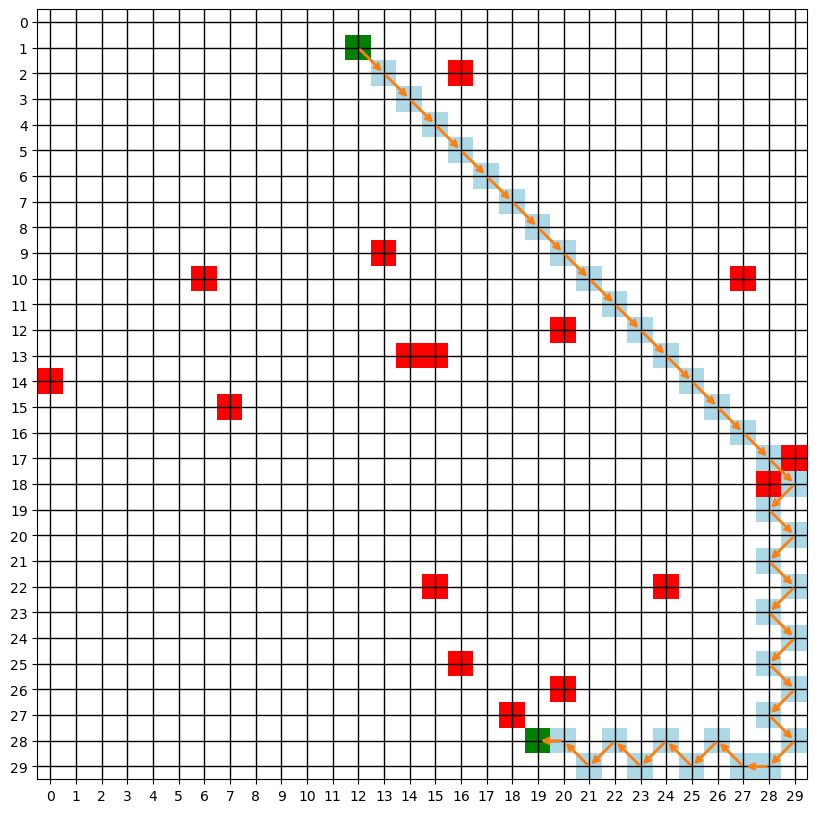

In [ ]:
plot_path(g2, path9)

Applying Uniform Cost Search :

In [ ]:
path10,visited10,max_in_memory10,cost10 = uniform_cost_search(g2,(1,12), (28,19), costs, movements)
print("The path of nodes : {}".format(path10))
print("The cost is : {}".format(cost10))
print("The number of visited nodes is : {}".format(visited10))
print("The number of maximum nodes in memory : {}".format(max_in_memory10))

The path of nodes : [(1, 12), (2, 12), (3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (9, 12), (10, 12), (11, 12), (12, 12), (13, 12), (14, 12), (15, 12), (16, 12), (17, 12), (18, 12), (19, 12), (20, 12), (21, 13), (22, 14), (23, 15), (24, 16), (25, 17), (26, 18), (27, 19), (28, 19)]
The cost is : 30.5
The number of visited nodes is : 826
The number of maximum nodes in memory : 57


Plotting The Path :

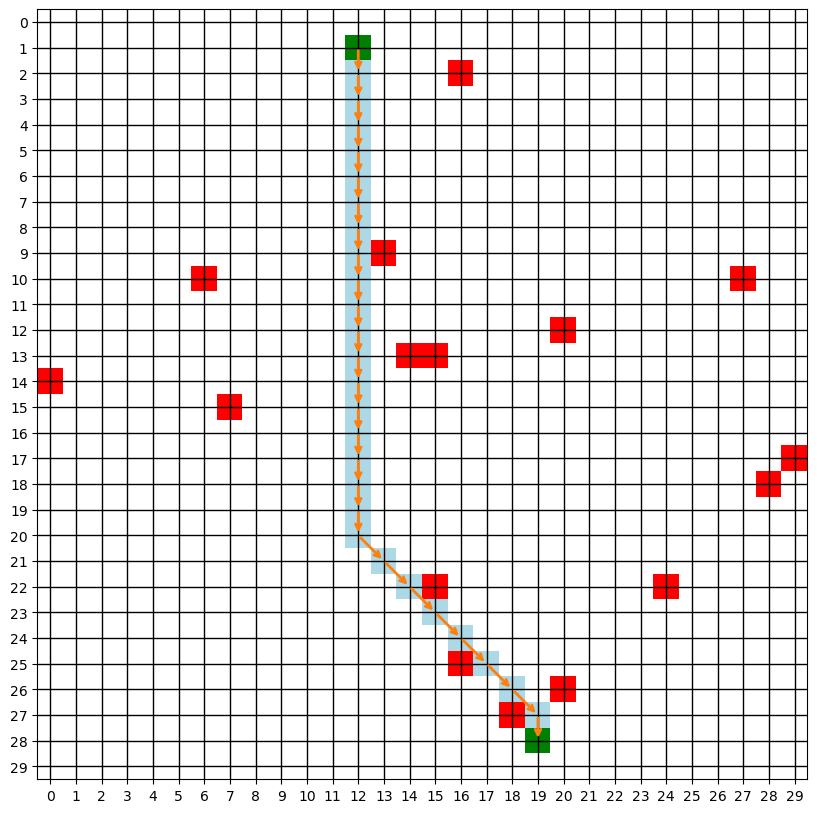

In [ ]:
plot_path(g2, path10)

Applying A* with Manhattan Distance :

In [ ]:
path11,visited11,max_in_memory11,cost11= A_star_manhattan(g2,(1,12), (28,19), costs, movements)
print("The path of nodes : {}".format(path11))
print("The cost is : {}".format(cost11))
print("The number of visited nodes is : {}".format(visited11))
print("The number of maximum nodes in memory : {}".format(max_in_memory11))

The path of nodes : [(1, 12), (2, 13), (3, 14), (4, 15), (5, 16), (6, 17), (7, 18), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19), (20, 19), (21, 19), (22, 19), (23, 19), (24, 19), (25, 19), (26, 19), (27, 19), (28, 19)]
The cost is : 30.5
The number of visited nodes is : 98
The number of maximum nodes in memory : 169


Plotting the path :

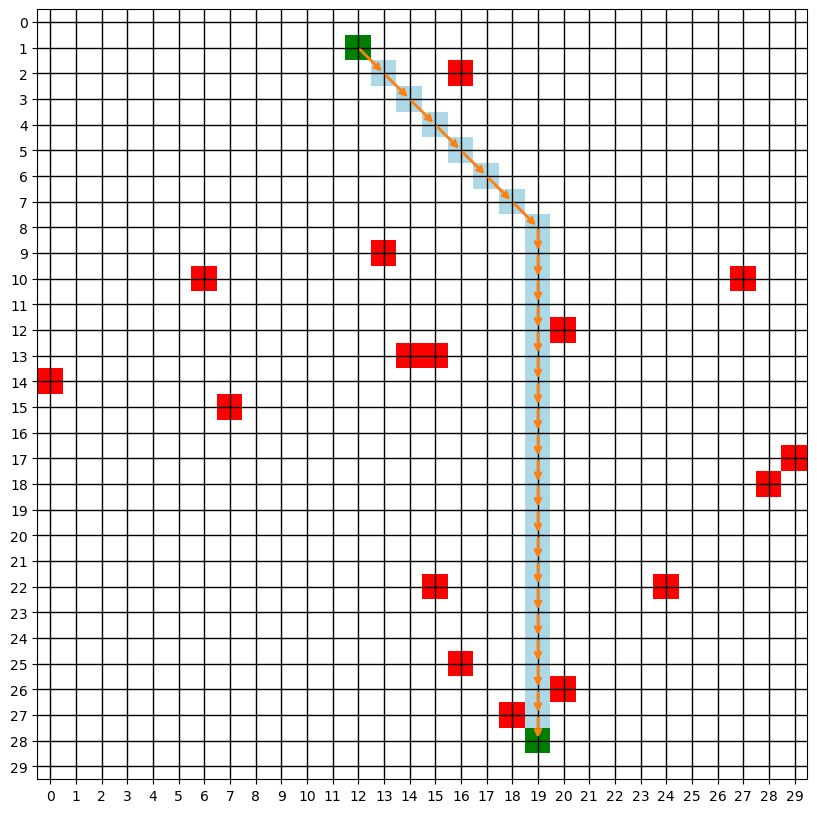

In [ ]:
plot_path(g2, path11)

Applying A* with Euclidian Distance :

In [ ]:
path12,visited12,max_in_memory12,cost12= A_star_euclidean(g2, (1,12), (28,19), costs, movements)
print("The path of nodes : {}".format(path12))
print("The cost is : {}".format(cost12))
print("The number of visited nodes is : {}".format(visited12))
print("The number of maximum nodes in memory : {}".format(max_in_memory12))

The path of nodes : [(1, 12), (2, 12), (3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (9, 12), (10, 12), (11, 12), (12, 12), (13, 12), (14, 12), (15, 12), (16, 12), (17, 12), (18, 12), (19, 12), (20, 12), (21, 13), (22, 14), (23, 15), (24, 16), (25, 17), (26, 18), (27, 19), (28, 19)]
The cost is : 30.5
The number of visited nodes is : 210
The number of maximum nodes in memory : 4167922


Plotting the path:

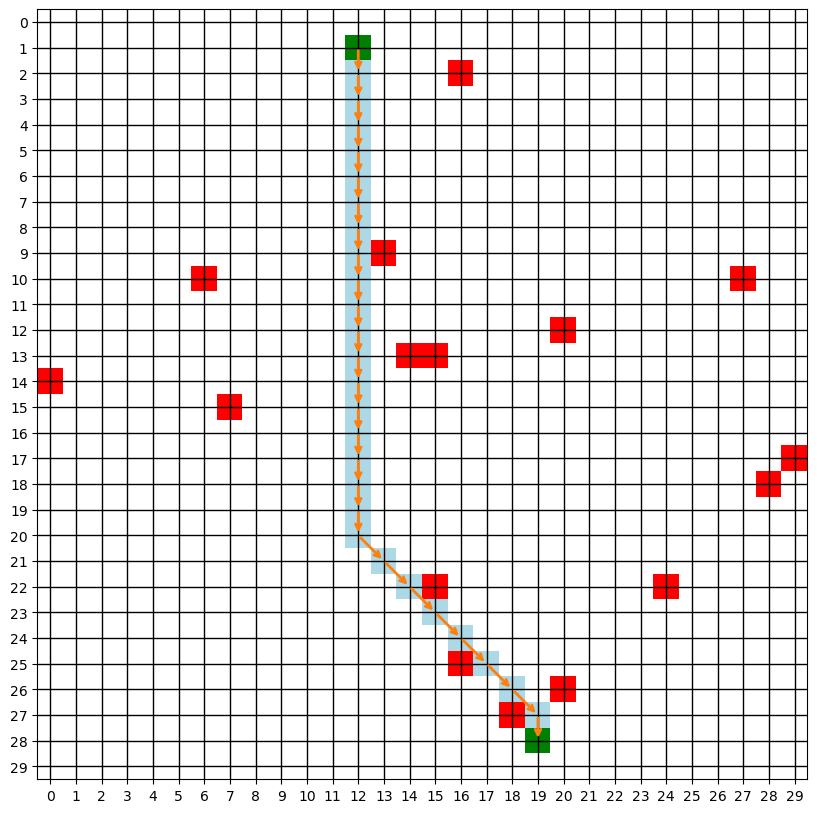

In [ ]:
plot_path(g2, path12)

Applying Q-learning :

In [ ]:
# Define the start and end nodes
start = (random.randint(0, 30-1), random.randint(0, 30-1))
end = (random.randint(0, 30-1), random.randint(0, 30-1))
rewards = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        if (i,j) == end:
            rewards[i][j] = 100
        elif g1[i][j] == 1:
            rewards[i][j] = -5

path13 = q_learning(g2, start, end, rewards)

Plotting The Path :

In [ ]:
plot_path(g2, path13)

We also encountered the same problem here.The code took a lot of time to run and it ended up not working since it uses a lot of memory storage.
It's due to the big size of the state space and the number of movements. We tried to reduce the number of episodes, the values of gamma, alpha and epsilon but it still didn't work.

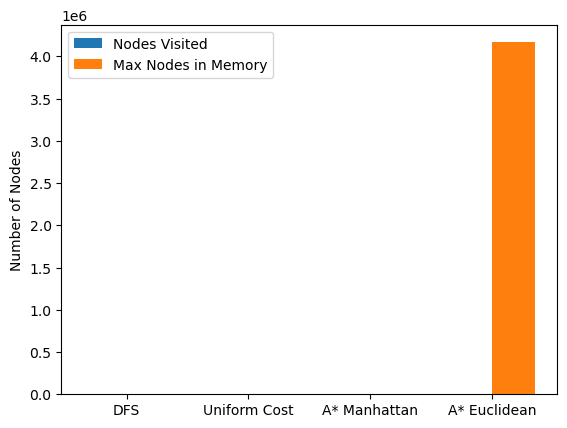

In [ ]:
algorithms = ['DFS', 'Uniform Cost', 'A* Manhattan', 'A* Euclidean']
nodes_visited = [visited9, visited10, visited11, visited12]
max_nodes = [max_in_memory9, max_in_memory10, max_in_memory11, max_in_memory12]

plot_algorithm_comparison(algorithms, nodes_visited, max_nodes)

### Interpretation

For the different algorithms, we obtained a varity of visited nodes and maximum nodes in memory :
* **DFS With Backtracking** : The number of visited nodes for this algorithm is 645 and the number of maximum nodes in memory is 1246.
* **Uniform Cost Search** : The number of visited nodes for this algorithm is 826 and the number of maximum nodes in memory is 57.
* **A* With Manhattan Distance** : The number of visited nodes for this algorithm is 98 and the number of maximum nodes in memory is 169.
* **A* With Euclidian Distance** : The number of visited nodes for this algorithm is 210 and the number of maximum nodes in memory is 4167922.

We can notice that the A* Euclidian has a very noticeable number of max nodes in memory. This is due to the fact that the A* algorithm itself tends to explore all the nodes. In addition to that, the Euclidean heuristic might not provide tight bounds on the actual cost, resulting in more nodes being expanded and stored in memory. In oppsition to the Manhattan heuristic, it tends to have better performance in terms of the number of nodes generated. As the size of the grid gets bigger, we can definetely say that using this algorithm is extremely costly.

When it comes to the other algorithms, the A* With Manhattan Distance is the most optimal one. This algorithm is known to be very effective as well because it explores the search space more efficiently. This algorithm was able to adapt so far to the three sizes of the grid. So, we can confirm its optimality.

DFS is also a costly algorithm as we can see the number of maximum nodes in memory is 116. DFS is not an optimal algorithm because it explores paths in a depth-first manner, meaning it prioritizes going as deep as possible before backtracking. In large grids with many obstacles, DFS can get stuck exploring a deep path without finding a solution, neglecting other parts of the grid. DFS,here, is not performing as well as for the other two grids. The number of maximum nodes in memory is 1246. It went from 116 to 1246 just by changing the size of the grid from 20*20 to 30*30. We can imagine the number of maximum nodes in memory for this algorithm if the size of the grid grows even bigger.

Uniform Cost Search also visits a lot of nodes while doing its search. It's totally understandable as this algorithm explores the search space uniformly, considering the cost of reaching each node from the start node. This algorithm as well can be quite costly when the search space is big. For this grid, the number of visited nodes is quite big. Due to the fact that Uniform Cost Search tends to visit a large number of nodes to ensure optimality in finding the path with the lowest cost. For this grid and bigger grids, it's becoming really costly.

##Q-Learning Algorithm Plots

Due to the problem encountered to execute the Q-learning algorithm, we couldn't answer the following questions by code unfortunately.

## 2.

But it's known that when we increase the value of gamma, the number of cycles increases as he agent may take more episodes to converge because it is considering a wider range of future possibilities and trying to optimize its long-term reward.

When we decrease the value of gamma, the agent becomes more myopic and focuses mainly on immediate rewards. This may lead to faster convergence and a smaller number of episodes required for the algorithm to converge.

When we increase alpha, it means that the agent gives more importance to the most recent experiences and updates the Q-values more significantly based on new information. This can lead to faster learning and convergence, as the agent adapts its policy more quickly to the rewards it encounters.

When we decrease alpha,the learning process becomes slower. As a result, it may require more episodes to converge to an optimal policy.